In [112]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import math

In [232]:
#calculate cost funtions
def cost(x,y,m):
    a=np.log(1+np.exp(-1*np.dot(x,m))) + (np.dot(x,m)*-1)*(y-1)
    return a.mean()

In [150]:
def h(m,x):
    a=1/(1+np.exp(-1*np.dot(x,m)))
    return a

In [134]:
k = np.array([1,2,3])
h(k,k)

array(0.99999917)

In [246]:
#calculate gradients and updte m and b values
def step_gradient(x,y,learning_rate ,m, batch_size):
    k=x.shape[0]
    n=x.shape[1]
    num_batches=math.ceil(k/batch_size)
    
    for b in range(num_batches):
        start=b * batch_size
        end= min((b+1)*batch_size , k)
        slope_m=np.zeros((x.shape[1],1))
        for j in range(n):
            
                #y_pred_i=np.dot(x[i],m)[0]
                #slope_m[j][0]+=(2/k)*x[i][j]*(y_pred_i - y_i)
                slope_m+= np.dot((h(m,x)-y).reshape(1,99),x)
        m= m - learning_rate*slope_m
    return m

In [201]:
#running multiple iterations of step gradient
def gradient_descent(x,y,learning_rate=0.1, num_iter = 100 , batch_size=32):
    m=np.zeros((x.shape[1],1))
    print("Start : ", cost(x,y,m))
    for i in range(num_iter):
        m = step_gradient(x,y,learning_rate ,m, batch_size)
        if(i*(num_iter//10)==0):
            print(i,": ", cost(x,y,m)) 
    print("END : ", cost(x,y,m))
    return (m)

In [117]:
iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [118]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [119]:
iris.columns=['pl','pw','sl','sw','type']

In [120]:
iris.columns

Index(['pl', 'pw', 'sl', 'sw', 'type'], dtype='object')

In [121]:
iris.head(10)

,pl,pw,sl,sw,type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [122]:
iris=iris.iloc[0:99,:]

In [123]:
iris

,pl,pw,sl,sw,type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [124]:
iris.describe()

,pl,pw,sl,sw
count,99.000000,99.000000,99.000000,99.000000
mean,5.474747,3.089899,2.876768,0.790909
std,0.643863,0.476701,1.448351,0.566062
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.000000,3.000000,1.000000
75%,5.900000,3.400000,4.350000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [125]:
itestx=iris.iloc[:,0:4]

In [127]:
itesty=iris.iloc[:,-1:]

In [211]:
itestyar=np.asarray(itesty)

In [216]:
for i in range(99):
    if itestyar[i]=='1':
        itesty[i]=1
    else:
        itestyar[i]=0

In [223]:
#data loading and calling gradient discent
def run(x,y):
    learning_rate=0.01
    num_iter=1000
    m=gradient_descent(x,y, learning_rate, num_iter)
    print(m)
    return m
    

In [247]:
a=run(np.asarray(itestx),np.asarray(itestyar))

Start :  0.6931471805599458


TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

# INBUILT FUNCTION 

In [169]:
x_0=np.array([[1,7],[1,8],[2,7],[2,9],[1.5,8],[1.7,7.5],[2.5,9],[3,7]])
x_1=np.array([[5,2],[6,3],[5.8,2.9],[7,1],[8,4],[7,3],[9,2.5],[7,3.5]])

In [187]:
x_0_x1=x_0[:,0]
x_0_x2=x_0[:,1]
x_1_x1=x_1[:,0]
x_1_x2=x_1[:,1]

In [188]:
x_1_x2

array([2. , 3. , 2.9, 1. , 4. , 3. , 2.5, 3.5])

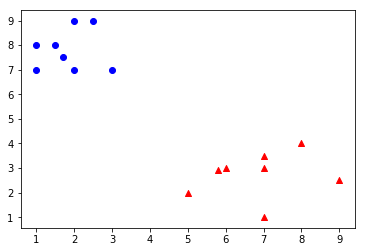

In [190]:
plt.scatter(x_0_x1,x_0_x2, Color = 'b')
plt.scatter(x_1_x1,x_1_x2, Color = 'r', marker='^')
plt.show()

In [182]:
from sklearn.linear_model import LogisticRegression

In [227]:
clf=LogisticRegression()

In [193]:
X=np.append(x_0,x_1,axis=0)

In [225]:
iris=datasets.load_iris()

In [229]:
clf.fit(iris.data,iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [230]:
clf.coef_ , clf.intercept_

(array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
        [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
        [-1.70752515, -1.53426834,  2.47097168,  2.55538211]]),
 array([ 0.26560617,  1.08542374, -1.21471458]))